# **Example usage of `OptimizedUnivariateEncoding`**

This example shows how to generate a model and compute statistics on both numerical and categorical variables.

# 1. Import Libraries and Load Data
Start by importing the required libraries and loading your dataset. Verify the data types to ensure proper preprocessing.

In [1]:
# Import necessary libraries
import pandas as pd
import kuplift
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("../data/data_uplift_missing.csv")

# Check the initial data types
print("Initial data types:")
print(df.dtypes)

Initial data types:
VAR1          float64
VAR2            int64
VAR3          float64
VAR4          float64
TRAITEMENT     object
CIBLE           int64
dtype: object


# 2. Data Preparation
Convert relevant columns to categorical types for better encoding. Check the data to ensure correctness.

In [2]:
# Convert categorical columns to object dtype if not detected
df = df.astype({"VAR2": object, "CIBLE": object})

# Verify the conversion
print("Data types after conversion:")
print(df.dtypes)

# Display the first few rows
df.head(10)

Data types after conversion:
VAR1          float64
VAR2           object
VAR3          float64
VAR4          float64
TRAITEMENT     object
CIBLE          object
dtype: object


,VAR1,VAR2,VAR3,VAR4,TRAITEMENT,CIBLE
0,NaN,0,11.076782,0.985791,T1,1
1,NaN,0,11.980937,0.606120,T1,1
2,NaN,0,11.800886,0.809460,T1,1
3,7.233434,7,24.466868,0.990217,T1,0
4,6.477910,6,22.955819,0.091321,T1,1
5,7.647167,7,25.294333,0.507881,T1,0
6,9.106443,9,28.212885,0.151324,T1,0
7,6.530299,6,23.060598,0.314967,T1,1
8,NaN,0,10.268365,0.659648,T1,1
9,NaN,0,10.884769,0.543725,T1,1


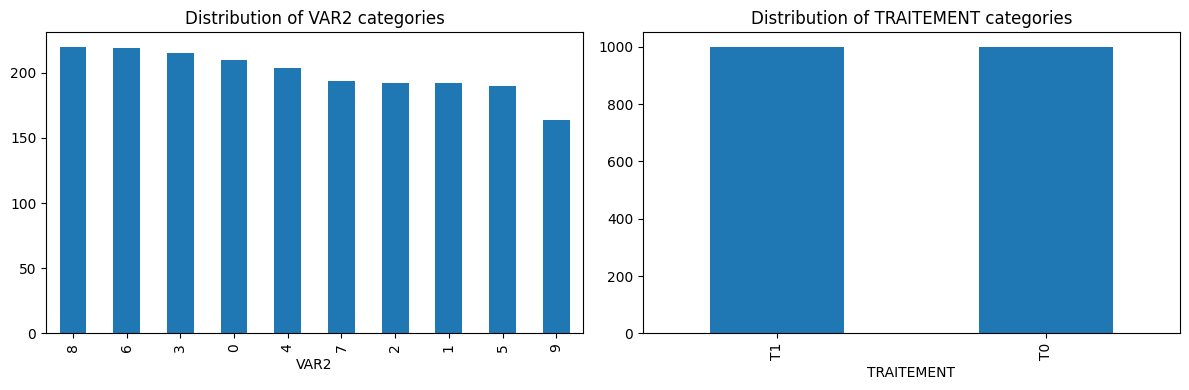

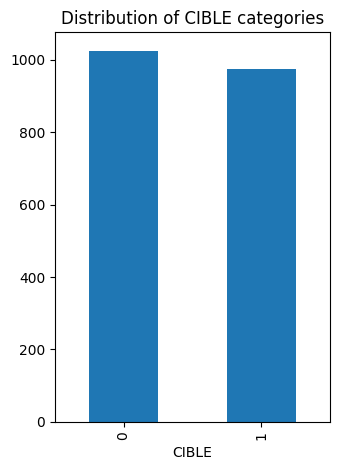

In [3]:
# Example: Plot category counts
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df['VAR2'].value_counts().plot(kind='bar')
plt.title('Distribution of VAR2 categories')

plt.subplot(1, 2, 2)
df['TRAITEMENT'].value_counts().plot(kind='bar')
plt.title('Distribution of TRAITEMENT categories')
plt.tight_layout()
plt.show()


plt.subplot(1, 2, 2)
df['CIBLE'].value_counts().plot(kind='bar')
plt.title('Distribution of CIBLE categories')
plt.tight_layout()
plt.show()


# 3. Univariate Encoding
Discretize variables to improve model interpretability and performance.

In [4]:
# Initialize the encoder
ue = kuplift.optimized_univariate_encoding.OptimizedUnivariateEncoding()

# Fit and transform the data
# Assuming 'TRAITEMENT' is the treatment column, 'CIBLE' is the outcome
encoded_df = ue.fit_transform(df[df.columns[:-2]], df["TRAITEMENT"], df["CIBLE"])
# just for fit 
# ue.fit(df[df.columns[:-2]], df["TRAITEMENT"], df["CIBLE"])

# Show the encoded data
encoded_df.head()

,VAR2,VAR1,VAR3
0,0,0,0
1,0,0,0
2,0,0,0
3,1,7,7
4,0,6,6


In [5]:
# Retrieve all variable levels
levels = ue.get_levels()

# Display levels
print("Variable levels after encoding:")
for var_name, level in levels:
    print(f"{var_name}: {level}")

Variable levels after encoding:
VAR2: 0.973101
VAR1: 0.883716
VAR3: 0.881227
VAR4: 0


VAR1: 10
VAR2: 2
VAR3: 10
VAR4: 1


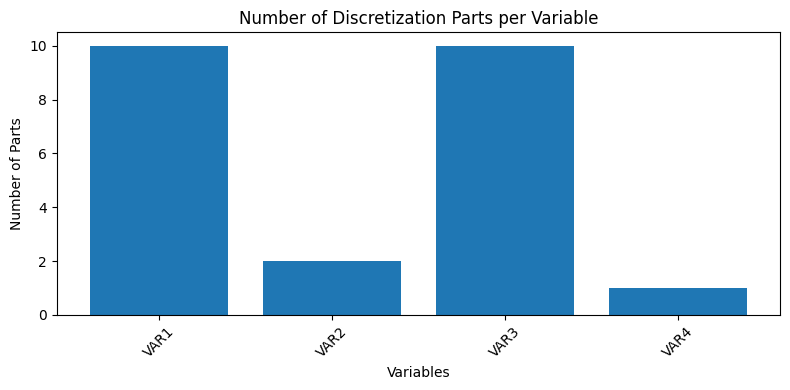

In [6]:
# List of input variables
variables = ue.input_variables

# Count parts for each variable, considering no partition if level=0
parts_per_variable = {var: len(list(ue.get_partition(var))) if var in ue.informative_input_variables else 1 for var in variables}

# Display the number of parts per variable
for var, count in parts_per_variable.items():
    print(f"{var}: {count}")

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.bar(parts_per_variable.keys(), parts_per_variable.values())
plt.xlabel('Variables')
plt.ylabel('Number of Parts')
plt.title('Number of Discretization Parts per Variable')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [7]:
levels = ue.get_levels()

if not levels:
    # Pas de niveaux, donc pas de partition
    print("No levels (no partition for this variable).")
else:
    # Traitement normal
    # Exemple : compter le nombre de niveaux pour une variable spécifique
    variable_name = "VAR1"
    num_levels = sum(1 for v, _ in levels if v == variable_name)
    print(f"Number of levels for {variable_name}: {num_levels}")

Number of levels for VAR1: 1


# 4. Partition and Frequency Analysis
"Examine how variables are partitioned and how target outcomes distribute across segments."

In [8]:
# Get partition details for specific variables
print("Partition for VAR1:\n", ue.get_partition("VAR1"))

# Get target frequencies for VAR1
freqs_var1 = ue.get_target_frequencies("VAR1")
print("Target frequencies for VAR1:\n", freqs_var1)

# Get target probabilities for VAR1
probs_var1 = ue.get_target_probabilities("VAR1")
print("Target probabilities for VAR1:\n", probs_var1)

Partition for VAR1:
 Interval partition
    10 intervals:
      - []
      - [-inf, 2.0004[
      - [2.0004, 3.00025[
      - [3.00025, 4[
      - [4, 4.9983[
      - [4.9983, 5.991[
      - [5.991, 7.0002[
      - [7.0002, 8.0009[
      - [8.0009, 9[
      - [9, inf[
Target frequencies for VAR1:
                 Part  (1|T1)  (1|T0)  (0|T1)  (0|T0)
0                 []     110       0       0     100
1     [-inf, 2.0004[       0      92     100       0
2  [2.0004, 3.00025[      95       0       0      97
3       [3.00025, 4[       0     108     107       0
4        [4, 4.9983[      97       0       0     106
5    [4.9983, 5.991[       0      93      97       1
6    [5.991, 7.0002[     106       0       0     113
7   [7.0002, 8.0009[       1      91     103       0
8        [8.0009, 9[     101       0       0     118
9           [9, inf[       0      81      83       0
Target probabilities for VAR1:
                 Part    (1|T1)    (1|T0)    (0|T1)    (0|T0)
0                 []  1.0

In [9]:
print(ue.get_partition("VAR1"))

Interval partition
    10 intervals:
      - []
      - [-inf, 2.0004[
      - [2.0004, 3.00025[
      - [3.00025, 4[
      - [4, 4.9983[
      - [4.9983, 5.991[
      - [5.991, 7.0002[
      - [7.0002, 8.0009[
      - [8.0009, 9[
      - [9, inf[


In [10]:
print(ue.get_partition("VAR2"))

Value group partition
    2 groups ("*" indicates the default group):
        - {8, 6, 0, 4, 2}
      * - {3, 7, 1, 5, 9}


# 5. uplift plot for VAR1 varible
Step plot of uplift with average uplift for VAR1 variable

In [11]:
ue.get_target_frequencies("VAR1")

,Part,(1|T1),(1|T0),(0|T1),(0|T0)
0,[],110,0,0,100
1,"[-inf, 2.0004[",0,92,100,0
2,"[2.0004, 3.00025[",95,0,0,97
3,"[3.00025, 4[",0,108,107,0
4,"[4, 4.9983[",97,0,0,106
5,"[4.9983, 5.991[",0,93,97,1
6,"[5.991, 7.0002[",106,0,0,113
7,"[7.0002, 8.0009[",1,91,103,0
8,"[8.0009, 9[",101,0,0,118
9,"[9, inf[",0,81,83,0


In [12]:
uplift_var1 = ue.get_uplift(1, "T0", "VAR1")

In [13]:
from kuplift.optimized_univariate_encoding import TargetTreatmentPair as TT
freqs_var1 = ue.get_target_frequencies("VAR1")
avg_uplift_T1_T0 = freqs_var1[TT(1, "T1")].sum() / (freqs_var1[TT(1, "T1")].sum() + freqs_var1[TT(0, "T1")].sum()) - freqs_var1[TT(1, "T0")].sum() / (freqs_var1[TT(1, "T0")].sum() + freqs_var1[TT(0, "T0")].sum())

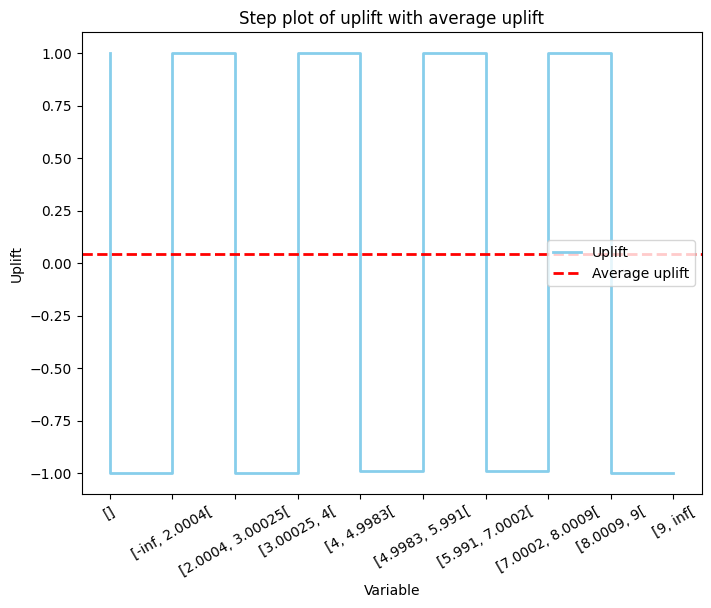

In [14]:
# Convert the 'Part' column to labels
x_labels = uplift_var1['Part'].astype(str)
x_positions = range(len(x_labels))

plt.figure(figsize=(8, 6))
plt.step(x_positions, uplift_var1['Uplift 1 T1'], color='skyblue', label='Uplift', linewidth=2)

# Add labels below each bar
plt.xticks(x_positions, x_labels, rotation=30)

# Add the reference line
plt.axhline(y=avg_uplift_T1_T0, color='red', linestyle='--', linewidth=2, label='Average uplift')

# Labels and title
plt.xlabel('Variable')
plt.ylabel('Uplift')
plt.title("Step plot of uplift with average uplift")
plt.legend()

plt.show()

# 6. Additional Variables Analysis
Compare the segmentation and uplift effects across different variables.

In [15]:
# Get partition details for VAR2
ue.get_partition("VAR2")

ValGrpPartition([ValGrp(['8', '6', '0', '4', '2']), ValGrp(['3', '7', '1', '5', '9'])], 1)

In [16]:
# Get target frequencies for VAR2
ue.get_target_frequencies("VAR2")

,Part,(1|T1),(1|T0),(0|T1),(0|T0)
0,"{8, 6, 0, 4, 2}",510,0,0,535
1,"{3, 7, 1, 5, 9}",0,465,490,0


In [17]:
# Get target probabilities for VAR2
ue.get_target_probabilities("VAR2")

,Part,(1|T1),(1|T0),(0|T1),(0|T0)
0,"{8, 6, 0, 4, 2}",1.0,0.0,0.0,1.0
1,"{3, 7, 1, 5, 9}",0.0,1.0,1.0,0.0


In [18]:
# Get Uplift for VAR2 with traget modality 1 and control group T0
ue.get_uplift(1, "T0", "VAR2")

,Part,Uplift 1 T1
0,"{8, 6, 0, 4, 2}",1.0
1,"{3, 7, 1, 5, 9}",-1.0
